In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
us_census_data = pd.read_csv('us-census-data.csv', index_col='state')
us_census_data.head()

,Census,Estimates Base,2010,2011,2012,2013,2014,2015
state,,,,,,,,
United States,"308,745,538","308,758,105","309,346,863","311,718,857","314,102,623","316,427,395","318,907,401","321,418,820"
Northeast,"55,317,240","55,318,348","55,387,174","55,638,038","55,835,056","56,019,353","56,171,281","56,283,891"
Midwest,"66,927,001","66,929,897","66,977,505","67,156,488","67,340,231","67,565,788","67,762,069","67,907,403"
South,"114,555,744","114,562,953","114,862,858","116,080,267","117,331,340","118,487,418","119,795,010","121,182,847"
West,"71,945,553","71,946,907","72,119,326","72,844,064","73,595,996","74,354,836","75,179,041","76,044,679"


In [100]:
us_kbp = pd.read_csv('output.csv',error_bad_lines=False)
us_kbp.head()

,number,date,year,state,g/r,g,r,name,img,age,how,kbp_link,news_link_text
0,1208.0,December 31,2015,NV,M/B,M,B,Keith Childress,http://www.killedbypolice.net/victims/151199.jpg,23,G,http://facebook.com/KilledByPolice/posts/11663...,http://www.reviewjournal.com/news/las-vegas/me...
1,1207.0,December 30,2015,WY,M/W,M,W,John R. Veach,http://www.killedbypolice.net/victims/151198.jpg,39,G,http://facebook.com/KilledByPolice/posts/11663...,http://trib.com/news/state-and-regional/rawlin...
2,1206.0,December 30,2015,CA,M/L,M,L,Fred Perez,http://www.killedbypolice.net/victims/151197.jpg,55,G,http://facebook.com/KilledByPolice/posts/11654...,http://abc30.com/news/1-man-dead-after-an-offi...
3,1205.0,December 29,2015,CA,M/A,M,A,Tien Hua,NaN,33,G,http://facebook.com/KilledByPolice/posts/11654...,http://www.nbclosangeles.com/news/local/barric...
4,1204.0,December 29,2015,CA,F/PI,F,PI,Siolosega Velega-Nuufolau,http://www.killedbypolice.net/victims/151192.jpg,50,G,http://facebook.com/KilledByPolice/posts/11649...,http://www.fresnobee.com/news/local/crime/arti...


In [101]:
kbp_by_state = us_kbp.groupby('state',as_index=False)
kbp_by_state.groups

{'AK': [212L, 340L, 362L, 1077L, 1113L, 1387L, 2125L, 2853L, 2983L],
 'AL': [160L,
  192L,
  260L,
  283L,
  331L,
  353L,
  419L,
  436L,
  581L,
  652L,
  659L,
  702L,
  735L,
  743L,
  919L,
  945L,
  952L,
  990L,
  1035L,
  1046L,
  1072L,
  1206L,
  1209L,
  1216L,
  1346L,
  1366L,
  1375L,
  1432L,
  1451L,
  1530L,
  1615L,
  1696L,
  1824L,
  1927L,
  1937L,
  1938L,
  1986L,
  2054L,
  2133L,
  2184L,
  2253L,
  2325L,
  2356L,
  2362L,
  2510L,
  2514L,
  2559L,
  2610L,
  2613L,
  2703L,
  2735L,
  2879L,
  2915L,
  2949L],
 'AR': [511L,
  755L,
  860L,
  1173L,
  1175L,
  1409L,
  1637L,
  1895L,
  1981L,
  2146L,
  2273L,
  2417L,
  2535L,
  2545L,
  2583L,
  2604L,
  2732L,
  2781L,
  2824L,
  2842L],
 'AZ': [8L,
  10L,
  68L,
  96L,
  111L,
  119L,
  287L,
  304L,
  386L,
  395L,
  412L,
  426L,
  464L,
  497L,
  548L,
  590L,
  603L,
  687L,
  717L,
  738L,
  775L,
  804L,
  829L,
  844L,
  890L,
  930L,
  936L,
  947L,
  955L,
  980L,
  999L,
  1010L,
  1014L,
  101

In [102]:
## Get counts by state

kbp_state_counts = kbp_by_state.count()[['state','number']]
kbp_state_counts.head()

,state,number
0,AK,9
1,AL,54
2,AR,20
3,AZ,120
4,CA,537


In [103]:
## I want num killed/total population by state
## First, I'm going to join us_census_date and kbp_by_state.count()[['state','number']]

us_census_data15 = us_census_data['2015']
# I'm just going to use 2015 population for all years

state_kbp_pop = kbp_state_counts.join(us_census_data15,on='state',how='inner')

In [104]:
state_kbp_pop['number'].head()

0      9
1     54
2     20
3    120
4    537
Name: number, dtype: int64

In [105]:
state_kbp_pop=state_kbp_pop.set_index('state')

In [122]:
state_kbp_pop.head()

,number,2015
state,,
AK,9,738432
AL,54,4858979
AR,20,2978204
AZ,120,6828065
CA,537,39144818


In [108]:
def str_to_num(s):
    return int(s.replace(",", ""))

In [109]:
state_kbp_pop['2015'] = state_kbp_pop['2015'].apply(str_to_num)

state_kbp_pop

,number,2015
state,,
AK,9,738432
AL,54,4858979
AR,20,2978204
AZ,120,6828065
CA,537,39144818
CO,66,5456574
CT,15,3590886
DC,12,672228
DE,10,945934


In [123]:
kbp_percent = state_kbp_pop['number'] / state_kbp_pop['2015']

kbp_percent

state
AK    1.218799e-05
AL    1.111345e-05
AR    6.715457e-06
AZ    1.757453e-05
CA    1.371829e-05
CO    1.209550e-05
CT    4.177242e-06
DC    1.785109e-05
DE    1.057156e-05
FL    1.159276e-05
GA    8.614900e-06
HI    8.382212e-06
IA    6.082143e-06
ID    7.855317e-06
IL    6.220842e-06
IN    7.553235e-06
KS    1.236416e-05
KY    1.016928e-05
LA    1.327417e-05
MA    4.709746e-06
MD    9.489876e-06
ME    1.053164e-05
MI    4.837453e-06
MN    6.193536e-06
MO    1.068434e-05
MS    1.269912e-05
MT    1.452153e-05
NC    8.165052e-06
ND    2.642263e-06
NE    9.492720e-06
NH    5.260753e-06
NJ    5.581595e-06
NM    2.349997e-05
NV    1.695006e-05
NY    3.889716e-06
OH    7.577439e-06
OK    2.070903e-05
OR    1.017628e-05
PA    5.389571e-06
PR    8.635126e-07
RI    2.840108e-06
SC    1.082484e-05
SD    9.318915e-06
TN    8.787481e-06
TX    1.092136e-05
UT    1.001362e-05
VA    5.725879e-06
VT    4.792011e-06
WA    1.115705e-05
WI    5.371372e-06
WV    1.247202e-05
WY    1.876790e-05
dtype:

Populating the interactive namespace from numpy and matplotlib


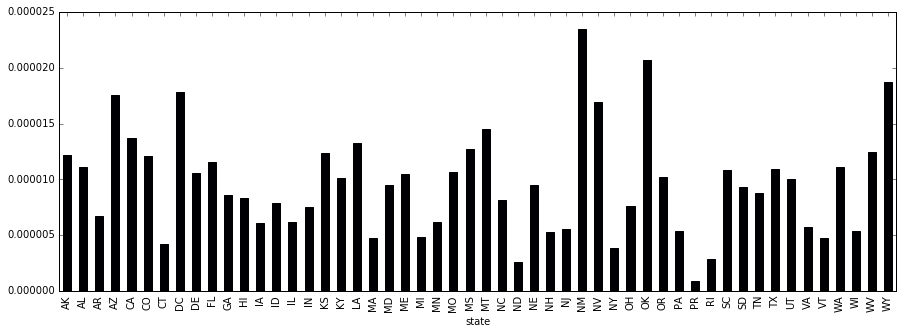

In [124]:
%pylab inline
kbp_percent.plot(kind='bar',figsize=(15,5),sort_columns=True,colormap='magma')
#label me!

In [128]:
guns_per_state = pd.read_csv('firearms-by-state.csv')
guns_per_state.head()

,state,numberguns
0,WY,114052
1,DC,42897
2,AR,123130
3,NM,84471
4,VA,248939


In [132]:
guns_per_state = guns_per_state.sort_values('state')

kbp_guns_pop = guns_per_state.join(state_kbp_pop,on='state')
#state_guns_pop = us_census_data.join(guns_per_state,on='state',how='left')
# kbp_state_counts.join(us_census_data15,on='state',how='inner')
kbp_guns_pop.head()

,state,numberguns,number,2015
8,AK,11167,9,738432
6,AL,96744,54,4858979
2,AR,123130,20,2978204
32,AZ,62527,120,6828065
39,CA,292877,537,39144818


In [134]:
def correlation(x,y):
    # first standardize the variables
    sdx = (x - x.mean()) / x.std(ddof=0)
    sdy = (y - y.mean()) / y.std(ddof=0)
    
    r = (sdx * sdy).mean()
    
    return r 

num_guns = kbp_guns_pop['numberguns']
num_kbp = kbp_guns_pop['number']

r = correlation(num_guns,num_kbp)

r

0.768269478711016

In [135]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

output_file("iris.html", title="iris.py example")

show(p)